In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)
folder = '/content/gdrive/My Drive'

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
from statsmodels.stats import weightstats
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import shapiro
from scipy.stats import kruskal
from scipy.stats import chi2_contingency
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#df = pd.read_csv(folder + '/DV/obesity_encoded-1.csv')
df = pd.read_csv('/content/obesity_encoded-1.csv')

In [4]:
# Hiểu về cấu trúc dữ liệu
num_rows, num_columns = df.shape
print(f'Số lượng quan sát: {num_rows}')
print(f'Số lượng cột: {num_columns}\n')
#Đọc kiểu dữ liệu của các biến
print(df.dtypes)

Số lượng quan sát: 2111
Số lượng cột: 17

age                  float64
height               float64
weight               float64
alcohol               object
high_caloric          object
vegetables             int64
main_meals             int64
water                  int64
physical_activity      int64
tech_devices           int64
between_meals         object
transportation        object
obesity               object
male                   int64
cal_monitor            int64
smoke                  int64
family_history         int64
dtype: object


In [15]:
df['BMI'] = round(df['weight'] / (df['height']) ** 2, 2)
df.head()

,age,height,weight,alcohol,high_caloric,vegetables,main_meals,water,physical_activity,tech_devices,between_meals,transportation,obesity,male,cal_monitor,smoke,family_history,BMI
0,21.0,1.62,64.0,no,no,2,3,2,0,1,Sometimes,Public_Transportation,Normal_Weight,0,0,0,1,24.39
1,21.0,1.52,56.0,Sometimes,no,3,3,3,3,0,Sometimes,Public_Transportation,Normal_Weight,0,1,1,1,24.24
2,23.0,1.80,77.0,Frequently,no,2,3,2,2,1,Sometimes,Public_Transportation,Normal_Weight,1,0,0,1,23.77
3,27.0,1.80,87.0,Frequently,no,3,3,2,2,0,Sometimes,Walking,Overweight_Level_I,1,0,0,0,26.85
4,22.0,1.78,89.8,Sometimes,no,2,1,2,0,0,Sometimes,Public_Transportation,Overweight_Level_II,1,0,0,0,28.34


In [16]:
df["high_caloric"] = df["high_caloric"].replace("yes", 1)
df["high_caloric"] = df["high_caloric"].replace("no", 0)

In [17]:
df['obesity'].value_counts()

,count
obesity,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


In [18]:
df["obesity"] = df["obesity"].replace("Insufficient_Weight", 1)
df["obesity"] = df["obesity"].replace("Normal_Weight", 2)
df["obesity"] = df["obesity"].replace("Overweight_Level_I", 3)
df["obesity"] = df["obesity"].replace("Overweight_Level_II", 4)
df["obesity"] = df["obesity"].replace("Obesity_Type_I", 5)
df["obesity"] = df["obesity"].replace("Obesity_Type_II", 6)
df["obesity"] = df["obesity"].replace("Obesity_Type_III", 7)

In [19]:
df.head()

,age,height,weight,alcohol,high_caloric,vegetables,main_meals,water,physical_activity,tech_devices,between_meals,transportation,obesity,male,cal_monitor,smoke,family_history,BMI
0,21.0,1.62,64.0,no,0,2,3,2,0,1,Sometimes,Public_Transportation,2,0,0,0,1,24.39
1,21.0,1.52,56.0,Sometimes,0,3,3,3,3,0,Sometimes,Public_Transportation,2,0,1,1,1,24.24
2,23.0,1.80,77.0,Frequently,0,2,3,2,2,1,Sometimes,Public_Transportation,2,1,0,0,1,23.77
3,27.0,1.80,87.0,Frequently,0,3,3,2,2,0,Sometimes,Walking,3,1,0,0,0,26.85
4,22.0,1.78,89.8,Sometimes,0,2,1,2,0,0,Sometimes,Public_Transportation,4,1,0,0,0,28.34


In [20]:
X = df.drop(['male', 'alcohol', 'high_caloric', 'cal_monitor', 'smoke', 'family_history', 'between_meals', 'transportation','obesity'] , axis=1)
y = df['obesity']
f_df = pd.concat([X, y], axis = 1)
print(f_df.head())

    age  height  weight  vegetables  main_meals  water  physical_activity  \
0  21.0    1.62    64.0           2           3      2                  0   
1  21.0    1.52    56.0           3           3      3                  3   
2  23.0    1.80    77.0           2           3      2                  2   
3  27.0    1.80    87.0           3           3      2                  2   
4  22.0    1.78    89.8           2           1      2                  0   

   tech_devices    BMI  obesity  
0             1  24.39        2  
1             0  24.24        2  
2             1  23.77        2  
3             0  26.85        3  
4             0  28.34        4  


In [21]:
from sklearn                 import metrics
from sklearn.feature_selection import SelectKBest, f_classif, chi2

## Ma trận tương quan

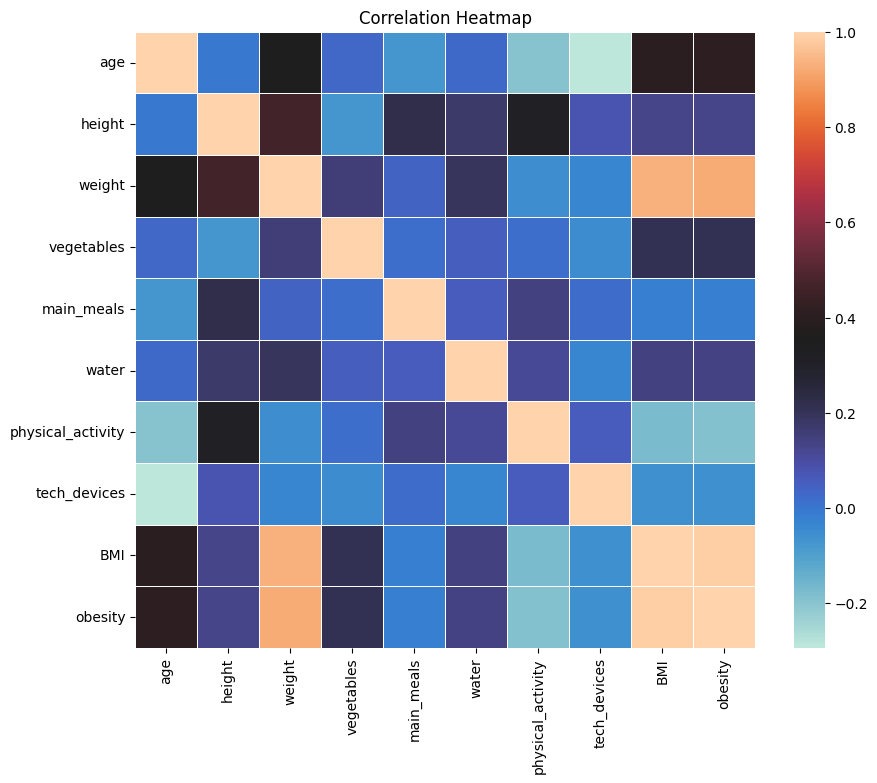

In [22]:
mx = f_df.corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(mx, cmap="icefire", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [23]:
correlation_pairs = []
for i in range(len(mx.columns)):
    for j in range(i + 1, len(mx.columns)):
        col1 = mx.columns[i]
        col2 = mx.columns[j]
        correlation_value = mx.iloc[i, j]
        if abs(correlation_value) > 0.7:
            correlation_pairs.append((col1, col2, correlation_value))

# Hiển thị các cặp cột có tương quan lớn hơn 0.7
for col1, col2, value in correlation_pairs:
    print(f"Cặp features: {col1} và {col2}, Hệ số tương quan: {value:.2f}")

Cặp features: weight và BMI, Hệ số tương quan: 0.93
Cặp features: weight và obesity, Hệ số tương quan: 0.92
Cặp features: BMI và obesity, Hệ số tương quan: 0.99


In [24]:
k_best = SelectKBest(score_func=f_classif, k=9) #dùng F-test đánh giá mức độ tương quan của mỗi feature với target

X_ = k_best.fit_transform(X, y)
y_ = y

#Trả về danh sách chỉ số của các đặc trưng được chọn
selected_features_indices = k_best.get_support(indices=True)

#Trả về một mảng chứa giá trị F của tất cả các đặc trưng
feature_scores = k_best.scores_

#Tạo danh sách các tuples gồm các đặc trưng và score tương ứng
feature_info = list(zip(X.columns, feature_scores))

#Sắp xếp danh sách feature_info theo giá trị F giảm dần.
sorted_feature_info = sorted(feature_info, key=lambda x: x[1], reverse=True)
# in ra top 10 đặc trưng có giá trị F cao nhất
for feature_name, feature_score in sorted_feature_info[:10]:
    print(f"{feature_name}: {feature_score:.2f}")

BMI: 10085.23
weight: 1966.52
vegetables: 91.02
age: 77.95
height: 38.43
main_meals: 25.30
water: 17.66
physical_activity: 17.20
tech_devices: 7.69


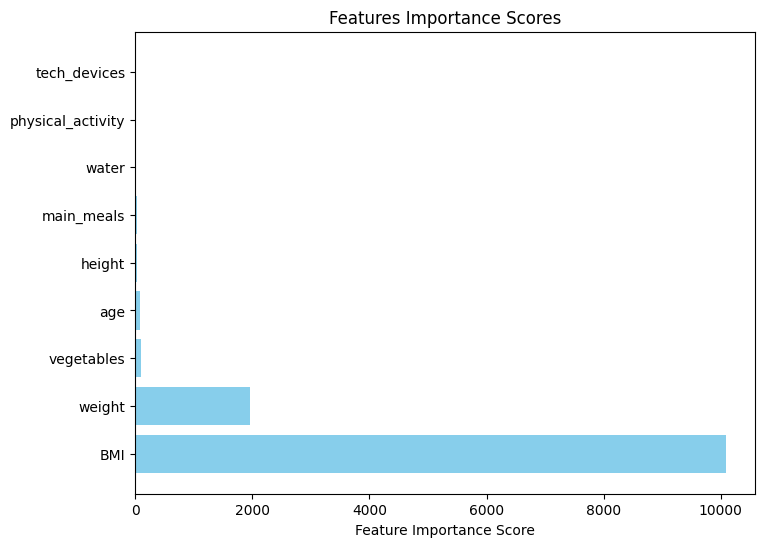

In [25]:
feature_names, feature_scores = zip(*sorted_feature_info[:])

plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_scores, color="skyblue")
plt.xlabel("Feature Importance Score")
plt.title("Features Importance Scores")
plt.show()

## Kiểm định giả thuyết đối với các biến số.


## Age không ảnh hưởng đến obesity
* H0: Trung bình độ tuổi là như nhau giữa các mức độ béo phì.
* H1: Có sự khác biệt về trung bình độ tuổi giữa các mức độ béo phì với nhau.

In [26]:
a_Obesity_Type_I = df[df['obesity'] == 5]['age']
a_Obesity_Type_II = df[df['obesity'] == 6]['age']
a_Obesity_Type_III = df[df['obesity'] == 7]['age']
a_Normal_Weight = df[df['obesity'] == 2]['age']
a_Overweight_Level_I = df[df['obesity'] == 3]['age']
a_Overweight_Level_II = df[df['obesity'] == 4]['age']
a_Insufficient_Weight = df[df['obesity'] == 1]['age']

In [27]:
f, p = stats.f_oneway(a_Obesity_Type_I,a_Obesity_Type_II,a_Obesity_Type_III, a_Normal_Weight,a_Overweight_Level_I, a_Overweight_Level_II, a_Insufficient_Weight )
print(f"ANOVA Test: F-statistic = {f:.2f}, p-value = {p:.3f}")
alpha = 0.05
## Kết luận theo phương pháp p-value (trị số p)
if (p < alpha):
    print(f'Trị số p = {p:} < {alpha:.4f} cho nên bác bỏ H0 ==> Có sự khác biệt giữa trung bình độ tuổi và các mức độ béo phì với nhau')
else:
    print(f'Trị số p = {p:} >= {alpha:.4f} cho nên không có sự khác biệt trung bình độ tuổi giữa các mức độ béo phì với nhau')

ANOVA Test: F-statistic = 77.95, p-value = 0.000
Trị số p = 3.59257951669993e-88 < 0.0500 cho nên bác bỏ H0 ==> Có sự khác biệt giữa trung bình độ tuổi và các mức độ béo phì với nhau


## Vegetables không ảnh hưởng đến obesity
* H0: Tần suất xuất hiện rau củ trong bữa ăn là như nhau giữa các mức độ béo phì.
* H1: Có sự khác biệt về tần suất xuất hiện rau củ trong bữa ăn giữa các mức độ béo phì với nhau.

In [28]:
v_Obesity_Type_I = df[df['obesity'] == 5]['vegetables']
v_Obesity_Type_II = df[df['obesity'] == 6]['vegetables']
v_Obesity_Type_III = df[df['obesity'] == 7]['vegetables']
v_Normal_Weight = df[df['obesity'] == 2]['vegetables']
v_Overweight_Level_I = df[df['obesity'] == 3]['vegetables']
v_Overweight_Level_II = df[df['obesity'] == 4]['vegetables']
v_Insufficient_Weight = df[df['obesity'] == 1]['vegetables']

In [29]:
f, p = stats.f_oneway(v_Obesity_Type_I, v_Obesity_Type_II, v_Obesity_Type_III, v_Normal_Weight, v_Overweight_Level_I, v_Overweight_Level_II, v_Insufficient_Weight )
print(f"ANOVA Test: F-statistic = {f:.2f}, p-value = {p:.3f}")
alpha = 0.05
## Kết luận theo phương pháp p-value (trị số p)
if (p < alpha):
    print(f'Trị số p = {p:.4f} < {alpha:.4f} cho nên bác bỏ H0 ==> Có sự khác biệt tần suất xuất hiện rau củ trong bữa ăn giữa các mức độ béo phì với nhau')
else:
    print(f'Trị số p = {p:.4f} >= {alpha:.4f} cho nên không có sự khác biệt tần suất xuất hiện rau củ trong bữa ăn giữa các mức độ béo phì với nhau')

ANOVA Test: F-statistic = 91.02, p-value = 0.000
Trị số p = 0.0000 < 0.0500 cho nên bác bỏ H0 ==> Có sự khác biệt tần suất xuất hiện rau củ trong bữa ăn giữa các mức độ béo phì với nhau


## Height không ảnh hưởng đến obesity

* H0: trung bình chiều cao là như nhau giữa các mức độ béo phì.
* H1: Có sự khác biệt về trung bình chiều cao giữa các mức độ béo phì với nhau.

In [30]:
h_Obesity_Type_I = df[df['obesity'] == 5]['height']
h_Obesity_Type_II = df[df['obesity'] == 6]['height']
h_Obesity_Type_III = df[df['obesity'] == 7]['height']
h_Normal_Weight = df[df['obesity'] == 2]['height']
h_Overweight_Level_I = df[df['obesity'] == 3]['height']
h_Overweight_Level_II = df[df['obesity'] == 4]['height']
h_Insufficient_Weight = df[df['obesity'] == 1]['height']

In [31]:
f, p = stats.f_oneway(h_Obesity_Type_I,h_Obesity_Type_II,h_Obesity_Type_III, h_Normal_Weight,h_Overweight_Level_I, h_Overweight_Level_II, h_Insufficient_Weight )
print(f"ANOVA Test: F-statistic = {f:.2f}, p-value = {p:.3f}")
alpha = 0.05
## Kết luận theo phương pháp p-value (trị số p)
if (p < alpha):
    print(f'Trị số p = {p} < {alpha:.4f} cho nên bác bỏ H0 ==> Có sự khác biệt trung bình chiều cao giữa các mức độ béo phì với nhau')
else:
    print(f'Trị số p = {p} >= {alpha:.4f} cho nên không có sự khác biệt trung bình chiều cao giữa các mức độ béo phì với nhau')

ANOVA Test: F-statistic = 38.43, p-value = 0.000
Trị số p = 1.6858535844061656e-44 < 0.0500 cho nên bác bỏ H0 ==> Có sự khác biệt trung bình chiều cao giữa các mức độ béo phì với nhau


## số lượng bữa ăn chính không ảnh hưởng đến obesity

* H0: Trung bình số bữa ăn chính là như nhau giữa các mức độ béo phì.
* H1: Có sự khác biệt về trung bình số bữa ăn chính giữa các mức độ béo phì với nhau.

In [32]:
mm_Obesity_Type_I = df[df['obesity'] == 5]['main_meals']
mm_Obesity_Type_II = df[df['obesity'] == 6]['main_meals']
mm_Obesity_Type_III = df[df['obesity'] == 7]['main_meals']
mm_Normal_Weight = df[df['obesity'] == 2]['main_meals']
mm_Overweight_Level_I = df[df['obesity'] == 3]['main_meals']
mm_Overweight_Level_II = df[df['obesity'] == 4]['main_meals']
mm_Insufficient_Weight = df[df['obesity'] == 1]['main_meals']

In [33]:
f, p = stats.f_oneway(mm_Obesity_Type_I,mm_Obesity_Type_II,mm_Obesity_Type_III, mm_Normal_Weight,mm_Overweight_Level_I, mm_Overweight_Level_II, mm_Insufficient_Weight )
print(f"ANOVA Test: F-statistic = {f:.2f}, p-value = {p:.3f}")
alpha = 0.05
## Kết luận theo phương pháp p-value (trị số p)
if (p < alpha):
    print(f'Trị số p = {p} < {alpha:.4f} cho nên bác bỏ H0 ==> Có sự khác biệt trung bình số bữa ăn giữa các mức độ béo phì với nhau')
else:
    print(f'Trị số p = {p} >= {alpha:.4f} cho nên không có sự khác biệt Trung bình số bữa ăn giữa các mức độ béo phì với nhau')

ANOVA Test: F-statistic = 25.30, p-value = 0.000
Trị số p = 3.8550490118623074e-29 < 0.0500 cho nên bác bỏ H0 ==> Có sự khác biệt trung bình số bữa ăn giữa các mức độ béo phì với nhau


## Lượng nước uống mỗi ngày không ảnh hưởng đến obesity

* H0: Trung bình lượng nước uống mỗi ngày là như nhau giữa các mức độ béo phì.
* H1: Có sự khác biệt về lượng nước uống mỗi ngày giữa các mức độ béo phì với nhau.

In [34]:
w_Obesity_Type_I = df[df['obesity'] == 5]['water']
w_Obesity_Type_II = df[df['obesity'] == 6]['water']
w_Obesity_Type_III = df[df['obesity'] == 7]['water']
w_Normal_Weight = df[df['obesity'] == 2]['water']
w_Overweight_Level_I = df[df['obesity'] == 3]['water']
w_Overweight_Level_II = df[df['obesity'] == 4]['water']
w_Insufficient_Weight = df[df['obesity'] == 1]['water']

In [35]:
f, p = stats.f_oneway(w_Obesity_Type_I,w_Obesity_Type_II, w_Obesity_Type_III, w_Normal_Weight,w_Overweight_Level_I, w_Overweight_Level_II, w_Insufficient_Weight )
print(f"ANOVA Test: F-statistic = {f:.2f}, p-value = {p:.3f}")
alpha = 0.05
## Kết luận theo phương pháp p-value (trị số p)
if (p < alpha):
    print(f'Trị số p = {p} < {alpha:.4f} cho nên bác bỏ H0 ==> Có sự khác biệt trung bình lượng nước uống mỗi ngày giữa các mức độ béo phì với nhau')
else:
    print(f'Trị số p = {p} >= {alpha:.4f} cho nên không có sự khác biệt trung bình lượng nước uống mỗi ngày giữa các mức độ béo phì với nhau')

ANOVA Test: F-statistic = 17.66, p-value = 0.000
Trị số p = 4.7370500035435097e-20 < 0.0500 cho nên bác bỏ H0 ==> Có sự khác biệt trung bình lượng nước uống mỗi ngày giữa các mức độ béo phì với nhau


## Tần suất hoạt động thể thao không ảnh hưởng đến obesity

* H0: Tần suất hoạt động thể thao là như nhau giữa các mức độ béo phì.
* H1: Có sự khác biệt về tần suất hoạt động thể thao giữa các mức độ béo phì với nhau.

In [36]:
pa_Obesity_Type_I = df[df['obesity'] == 5]['physical_activity']
pa_Obesity_Type_II = df[df['obesity'] == 6]['physical_activity']
pa_Obesity_Type_III = df[df['obesity'] == 7]['physical_activity']
pa_Normal_Weight = df[df['obesity'] == 2]['physical_activity']
pa_Overweight_Level_I = df[df['obesity'] == 3]['physical_activity']
pa_Overweight_Level_II = df[df['obesity'] == 4]['physical_activity']
pa_Insufficient_Weight = df[df['obesity'] == 1]['physical_activity']

In [37]:
f, p = stats.f_oneway(pa_Obesity_Type_I,pa_Obesity_Type_II,pa_Obesity_Type_III, pa_Normal_Weight,pa_Overweight_Level_I, pa_Overweight_Level_II, pa_Insufficient_Weight )
print(f"ANOVA Test: F-statistic = {f:.2f}, p-value = {p:.3f}")
alpha = 0.05
## Kết luận theo phương pháp p-value (trị số p)
if (p < alpha):
    print(f'Trị số p = {p} < {alpha:.4f} cho nên bác bỏ H0 ==> Có sự khác biệt trung bình chiều cao giữa các mức độ béo phì với nhau')
else:
    print(f'Trị số p = {p} >= {alpha:.4f} cho nên không có sự khác biệt trung bình chiều cao giữa các mức độ béo phì với nhau')

ANOVA Test: F-statistic = 17.20, p-value = 0.000
Trị số p = 1.6807840980074483e-19 < 0.0500 cho nên bác bỏ H0 ==> Có sự khác biệt trung bình chiều cao giữa các mức độ béo phì với nhau


## Thời gian sử dụng các thiết bị điện tử mỗi ngày không ảnh hưởng đến obesity

* H0: Trung bình thời gian sử dụng các thiết bị điện tử mỗi ngày là như nhau giữa các mức độ béo phì.
* H1: Có sự khác biệt về trung bình thời gian sử dụng các thiết bị điện tử mỗi ngày giữa các mức độ béo phì với nhau.

In [38]:
td_Obesity_Type_I = df[df['obesity'] == 5]['tech_devices']
td_Obesity_Type_II = df[df['obesity'] == 6]['tech_devices']
td_Obesity_Type_III = df[df['obesity'] == 7]['tech_devices']
td_Normal_Weight = df[df['obesity'] == 2]['tech_devices']
td_Overweight_Level_I = df[df['obesity'] == 3]['tech_devices']
td_Overweight_Level_II = df[df['obesity'] == 4]['tech_devices']
td_Insufficient_Weight = df[df['obesity'] == 1]['tech_devices']

In [39]:
f, p = stats.f_oneway(td_Obesity_Type_I,td_Obesity_Type_II,td_Obesity_Type_III, td_Normal_Weight,td_Overweight_Level_I, td_Overweight_Level_II, td_Insufficient_Weight)
print(f"ANOVA Test: F-statistic = {f}, p-value = {p}")
h_stat, p_value_kruskal = kruskal(td_Obesity_Type_I,td_Obesity_Type_II,td_Obesity_Type_III, td_Normal_Weight,td_Overweight_Level_I, td_Overweight_Level_II, td_Insufficient_Weight )
print(f"Kruskal-Wallis Test: H-statistic = {h_stat:}, p-value = {p_value_kruskal}")
alpha = 0.05
## Kết luận theo phương pháp p-value (trị số p)
if (p < alpha):
    print(f'Trị số p = {p} < {alpha:.4f} cho nên bác bỏ H0 ==> Có sự khác biệt trung bình chiều cao giữa các mức độ béo phì với nhau')
else:
    print(f'Trị số p = {p} >= {alpha:.4f} cho nên không có sự khác biệt trung bình chiều cao giữa các mức độ béo phì với nhau')

ANOVA Test: F-statistic = 7.694943122726869, p-value = 3.375625780587961e-08
Kruskal-Wallis Test: H-statistic = 49.86649850793875, p-value = 4.9998455090557935e-09
Trị số p = 3.375625780587961e-08 < 0.0500 cho nên bác bỏ H0 ==> Có sự khác biệt trung bình chiều cao giữa các mức độ béo phì với nhau


## Kiểm định giả thuyết: giới tính và BMI độc lập
* H0: μ(BMI)[Male] == μ(BMI)[Female]
* H1: μ(BMI)[Male] != μ(BMI)[Female]



In [40]:
df['male'].value_counts()

,count
male,
1,1068
0,1043


In [41]:
df_gb = df.groupby('male')['BMI'].var()
print(df_gb)

male
0    88.350724
1    40.282287
Name: BMI, dtype: float64


In [42]:
male_bmi = df[df['male'] == 1]['BMI']
female_bmi = df[df['male'] == 0]['BMI']

male_bmi_array = np.array(male_bmi)
female_bmi_array = np.array(female_bmi)

alpha = 0.05
confidence_level = 1 - alpha

col1 = weightstats.DescrStatsW(male_bmi)
col2 = weightstats.DescrStatsW(female_bmi)
cm_obj = weightstats.CompareMeans(col1, col2)
zstat, pvalue = cm_obj.ztest_ind(usevar='unequal')

if (pvalue < alpha):
    print(f'Trị số p = {pvalue:.4f} < {alpha}',
          'nên bác bỏ H0.\n=> μ[Male] != μ[Female]')
else:
    print(f'Trị số p = {pvalue:.4f} >= {alpha}',
          'nên chấp nhận H0.\n=> μ[Male] == μ[Female]')

Trị số p = 0.0152 < 0.05 nên bác bỏ H0.
=> μ[Male] != μ[Female]


## Kiểm định giả thuyết: Phương tiện thường sử dụng để di chuyển và BMI độc lập
* H0: μ(BMI)[Public_Transportation] == μ(BMI)[Automobile] == μ(BMI)[Walking] == μ(BMI)[Motorbike] == μ(BMI)[Bike]
* H1: tồn tại ít nhất một μ khác biệt



In [43]:
pt_bmi = df[df['transportation'] == 'Public_Transportation']['BMI']
am_bmi = df[df['transportation'] == 'Automobile']['BMI']
wl_bmi = df[df['transportation'] == 'Walking']['BMI']
mb_bmi = df[df['transportation'] == 'Motorbike']['BMI']
bk_bmi = df[df['transportation'] == 'Bike']['BMI']

In [44]:
df['transportation'].value_counts()

,count
transportation,
Public_Transportation,1580
Automobile,457
Walking,56
Motorbike,11
Bike,7


In [45]:
f, p = stats.f_oneway(pt_bmi, am_bmi, wl_bmi, mb_bmi, bk_bmi)
if (p < alpha):
    print(f'* Trị số p = {p} < {alpha:.4f} cho nên bác bỏ H0 ==> có sự khác biệt giữa loại phương tiện di chuyển và BMI')
else:
    print(f'* Trị số p = {p} >= {alpha:.4f} cho nên KHÔNG bác bỏ H0 ==> KHÔNG có sự khác biệt giữa loại phương tiện di chuyển và BMI')

* Trị số p = 9.93929385311548e-09 < 0.0500 cho nên bác bỏ H0 ==> có sự khác biệt giữa loại phương tiện di chuyển và BMI


## phân loại


In [46]:
alpha            = .05
confidence_level = (1 - alpha)

## Giới tính không có ảnh hưởng tới mức độ béo phì(không cần)
* H0: Giới tính và mức độ béo phì độc lập.
* H1: Giới tính có tác động đến mức độ béo phì.

In [47]:
# Tạo bảng tần suất (Contingency Table)
contingency_table_1 = pd.crosstab(df['obesity'], df['transportation'])
print("Contingency Table:")
print(contingency_table_1)

Contingency Table:
transportation  Automobile  Bike  Motorbike  Public_Transportation  Walking
obesity                                                                    
1                       46     0          0                    220        6
2                       45     4          6                    200       32
3                       66     2          1                    212        9
4                       94     0          1                    189        6
5                      110     0          3                    236        2
6                       95     1          0                    200        1
7                        1     0          0                    323        0


In [48]:
## Kiểm định Chi-square
stat, p, ddof, expected = stats.chi2_contingency(contingency_table_1)

In [49]:
# critical = stats.chi2.ppf(confidence_level, ddof)
# print(f'probability={confidence_level:.4f}\ncritical={critical:.4f}\nstat={stat:.3f}\n')

if (p < alpha):
    print(f'Trị số p = {p} < {alpha:.4f} nên bác bỏ H0.',
          '\n=> Giới tính có ảnh hưởng đến trạng thái béo phì.')
else:
    print(f'Trị số p = {p} >= {alpha:.4f} nên chấp nhận H0.',
          '\n=> Giới tính không ảnh hưởng đến trạng thái béo phì')

Trị số p = 5.177915203835779e-48 < 0.0500 nên bác bỏ H0. 
=> Giới tính có ảnh hưởng đến trạng thái béo phì.


## Tần suất sử dụng đồ uống có chứa cồn không có ảnh hưởng tới mức độ béo phì
* H0: Tần suất sử dụng đồ uống có chứa cồn và mức độ béo phì độc lập.
* H1: Tần suất sử dụng đồ uống có chứa cồn có tác động đến mức độ béo phì.

In [50]:
# Tạo bảng tần suất (Contingency Table)
contingency_table_2 = pd.crosstab(df['obesity'], df['alcohol'])
print("Contingency Table:")
print(contingency_table_2)

Contingency Table:
alcohol  Always  Frequently  Sometimes   no
obesity                                    
1             0           1        154  117
2             1          18        161  107
3             0          16        224   50
4             0          19        143  128
5             0          14        172  165
6             0           2        224   71
7             0           0        323    1


In [51]:
## Kiểm định Chi-square
stat, p, ddof, expected = stats.chi2_contingency(contingency_table_2)

In [52]:
# critical = stats.chi2.ppf(confidence_level, ddof)
# print(f'probability={confidence_level:.4f}\ncritical={critical:.4f}\nstat={stat:.3f}\n')

if (p < alpha):
    print(f'Trị số p = {p} < {alpha:.4f} nên bác bỏ H0.',
          '\n=> Tần suất sử dụng đồ uống có chứa cồn  có ảnh hưởng đến trạng thái béo phì.')
else:
    print(f'Trị số p = {p} >= {alpha:.4f} nên chấp nhận H0.',
          '\n=> Tần suất sử dụng đồ uống có chứa cồn không ảnh hưởng đến trạng thái béo phì')

Trị số p = 5.287157877798169e-61 < 0.0500 nên bác bỏ H0. 
=> Tần suất sử dụng đồ uống có chứa cồn  có ảnh hưởng đến trạng thái béo phì.


## Sử dụng thức ăn chứa nhiều calo không có ảnh hưởng tới mức độ béo phì
* H0: Sử dụng thức ăn chứa nhiều calo và mức độ béo phì độc lập.
* H1: Sử dụng thức ăn chứa nhiều calo có tác động đến mức độ béo phì.

In [53]:
# Tạo bảng tần suất (Contingency Table)
contingency_table_3 = pd.crosstab(df['obesity'], df['high_caloric'])
print("Contingency Table:")
print(contingency_table_3)

Contingency Table:
high_caloric   0    1
obesity              
1             51  221
2             79  208
3             22  268
4             74  216
5             11  340
6              7  290
7              1  323


In [54]:
## Kiểm định Chi-square
stat, p, ddof, expected = stats.chi2_contingency(contingency_table_3)

In [55]:
if (p < alpha):
    print(f'Trị số p = {p} < {alpha:.4f} nên bác bỏ H0.',
          '\n=> Sử dụng thức ăn chứa nhiều calo có ảnh hưởng đến trạng thái béo phì.')
else:
    print(f'Trị số p = {p} >= {alpha:.4f} nên chấp nhận H0.',
          '\n=> Sử dụng thức ăn chứa nhiều calo không ảnh hưởng đến trạng thái béo phì')

Trị số p = 1.4822362082358762e-47 < 0.0500 nên bác bỏ H0. 
=> Sử dụng thức ăn chứa nhiều calo có ảnh hưởng đến trạng thái béo phì.


## Tiền sử gia đình có người mắc béo phì không có ảnh hưởng tới mức độ béo phì
* H0: Gia đình đã có người mắc béo phì và mức độ béo phì độc lập.
* H1: Gia đình đã người mắc béo phì có tác động đến mức độ béo phì.

In [56]:
# Tạo bảng tần suất (Contingency Table)
contingency_table_4 = pd.crosstab(df['obesity'], df['family_history'])
print("Contingency Table:")
print(contingency_table_4)

Contingency Table:
family_history    0    1
obesity                 
1               146  126
2               132  155
3                81  209
4                18  272
5                 7  344
6                 1  296
7                 0  324


In [57]:
## Kiểm định Chi-square
stat, p, ddof, expected = stats.chi2_contingency(contingency_table_4)

In [58]:
if (p < alpha):
    print(f'Trị số p = {p} < {alpha:.4f} nên bác bỏ H0.',
          '\n=> Gia đình đã có người mắc béo phì có ảnh hưởng đến trạng thái béo phì.')
else:
    print(f'Trị số p = {p} >= {alpha:.4f} nên chấp nhận H0.',
          '\n=> Gia đình có người mắc béo phì không ảnh hưởng đến trạng thái béo phì')

Trị số p = 4.2280167944702657e-131 < 0.0500 nên bác bỏ H0. 
=> Gia đình đã có người mắc béo phì có ảnh hưởng đến trạng thái béo phì.


## Tần suất ăn vặt (các bữa ăn khác ngoài bữa chính) không có ảnh hưởng tới mức độ béo phì
* H0: Tần suất ăn vặt (các bữa ăn khác ngoài bữa chính) và mức độ béo phì độc lập.
* H1: Tần suất ăn vặt (các bữa ăn khác ngoài bữa chính) có tác động đến mức độ béo phì.

In [59]:
# Tạo bảng tần suất (Contingency Table)
contingency_table_5 = pd.crosstab(df['obesity'], df['between_meals'])
print("Contingency Table:")
print(contingency_table_5)

Contingency Table:
between_meals  Always  Frequently  Sometimes  no
obesity                                         
1                   2         121        146   3
2                  35          83        159  10
3                   5          14        236  35
4                   3          16        270   1
5                   6           6        338   1
6                   2           1        293   1
7                   0           1        323   0


In [60]:
## Kiểm định Chi-square
stat, p, ddof, expected = stats.chi2_contingency(contingency_table_5)

In [61]:
if (p < alpha):
    print(f'Trị số p = {p} < {alpha:.4f} nên bác bỏ H0.',
          '\n=> Tần suất ăn vặt (các bữa ăn khác ngoài bữa chính) có ảnh hưởng đến trạng thái béo phì.')
else:
    print(f'Trị số p = {p} >= {alpha:.4f} nên chấp nhận H0.',
          '\n=> Tần suất ăn vặt (các bữa ăn khác ngoài bữa chính) không ảnh hưởng đến trạng thái béo phì')

Trị số p = 7.383852893286775e-159 < 0.0500 nên bác bỏ H0. 
=> Tần suất ăn vặt (các bữa ăn khác ngoài bữa chính) có ảnh hưởng đến trạng thái béo phì.


### TRỰC QUAN HÓA DỮ LIỆU

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [63]:
df

,age,height,weight,alcohol,high_caloric,vegetables,main_meals,water,physical_activity,tech_devices,between_meals,transportation,obesity,male,cal_monitor,smoke,family_history,BMI
0,21.000000,1.620000,64.000000,no,0,2,3,2,0,1,Sometimes,Public_Transportation,2,0,0,0,1,24.39
1,21.000000,1.520000,56.000000,Sometimes,0,3,3,3,3,0,Sometimes,Public_Transportation,2,0,1,1,1,24.24
2,23.000000,1.800000,77.000000,Frequently,0,2,3,2,2,1,Sometimes,Public_Transportation,2,1,0,0,1,23.77
3,27.000000,1.800000,87.000000,Frequently,0,3,3,2,2,0,Sometimes,Walking,3,1,0,0,0,26.85
4,22.000000,1.780000,89.800000,Sometimes,0,2,1,2,0,0,Sometimes,Public_Transportation,4,1,0,0,0,28.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,Sometimes,1,3,3,2,2,1,Sometimes,Public_Transportation,7,0,0,0,1,44.90
2107,21.982942,1.748584,133.742943,Sometimes,1,3,3,2,1,1,Sometimes,Public_Transportation,7,0,0,0,1,43.74
2108,22.524036,1.752206,133.689352,Sometimes,1,3,3,2,1,1,Sometimes,Public_Transportation,7,0,0,0,1,43.54
2109,24.361936,1.739450,133.346641,Sometimes,1,3,3,3,1,1,Sometimes,Public_Transportation,7,0,0,0,1,44.07


BIỂU ĐỒ THỂ HIỆN MỨC ĐỘ BÉO PHÌ THEO CÁC NHÓM TUỔI

In [64]:
# prompt: đổi ngược lại giúp tôi
# df["obesity"] = df["obesity"].replace("Insufficient_Weight", 1)
# df["obesity"] = df["obesity"].replace("Normal_Weight", 2)
# df["obesity"] = df["obesity"].replace("Overweight_Level_I", 3)
# df["obesity"] = df["obesity"].replace("Overweight_Level_II", 4)
# df["obesity"] = df["obesity"].replace("Obesity_Type_I", 5)
# df["obesity"] = df["obesity"].replace("Obesity_Type_II", 6)
# df["obesity"] = df["obesity"].replace("Obesity_Type_III", 7)

mapping = {1: "Insufficient_Weight", 2: "Normal_Weight", 3: "Overweight_Level_I",
            4: "Overweight_Level_II", 5: "Obesity_Type_I", 6: "Obesity_Type_II",
            7: "Obesity_Type_III"}
df["obesity"] = df["obesity"].replace(mapping)

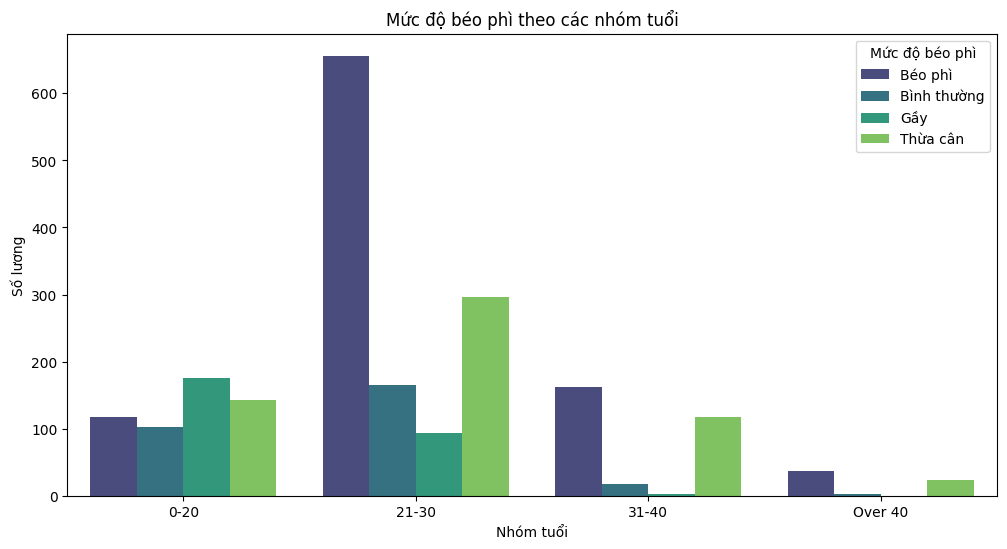

In [65]:

# Create a mapping from 'obesity' values to the desired categories
obesity_mapping = {
    'Insufficient_Weight': 'Gầy',
    'Normal_Weight': 'Bình thường',
    'Overweight_Level_I': 'Thừa cân',
    'Overweight_Level_II': 'Thừa cân',
    'Obesity_Type_I': 'Béo phì',
    'Obesity_Type_II': 'Béo phì',
    'Obesity_Type_III': 'Béo phì'
}

# Create the new column 'Obesity_Level' using the mapping
df['Obesity_Level'] = df['obesity'].map(obesity_mapping)

# Create age group categories
bins = [0, 20, 30, 40, float('inf')]
labels = ['0-20', '21-30', '31-40', 'Over 40']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Calculate obesity counts per age group
obesity_counts = df.groupby(['age_group', 'Obesity_Level']).size().reset_index(name='counts')

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='counts', hue='Obesity_Level',palette='viridis', data=obesity_counts)
plt.title('Mức độ béo phì theo các nhóm tuổi')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Số lương')

plt.legend(title='Mức độ béo phì')
plt.show()

df.drop('age_group', axis = 1, inplace = True)


Tần suất hoạt động thể dục thể thao theo tiền sử gia đình và mức độ béo phì

In [66]:
# chọn nhóm tuổi từ 21 tới 30
teen_df = df[(df['age'] > 20) & (df['age'] < 31)]

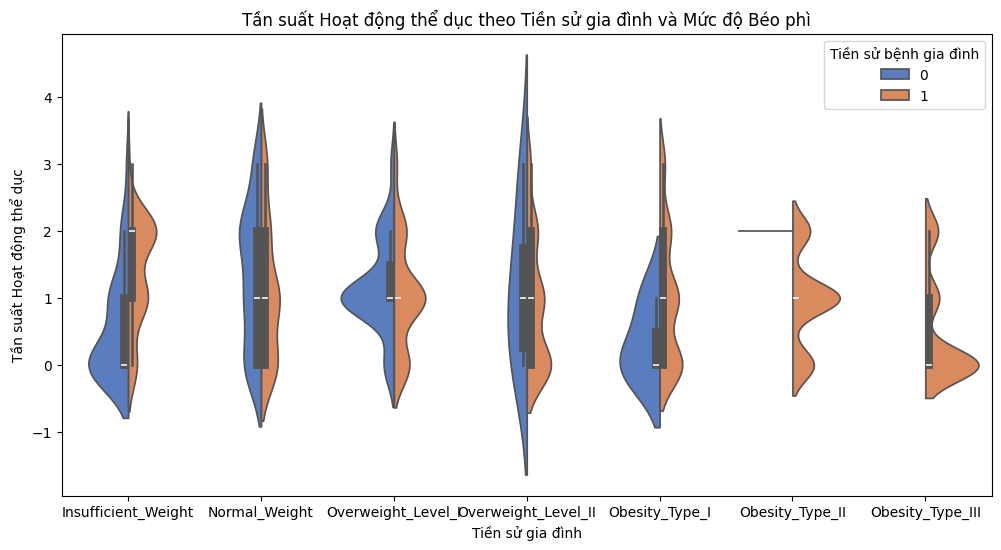

In [67]:
# set thứ tự của obesity
obesity_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
# Chuyển đổi cột obesity thành kiểu danh mục (categorical) với thứ tự tùy chỉnh
teen_df['obesity'] = pd.Categorical(teen_df['obesity'], categories=obesity_order, ordered=True)

plt.figure(figsize=(12, 6))
sb.violinplot(data=teen_df, x='obesity', y='physical_activity', hue='family_history', split=True, palette='muted')
plt.title('Tần suất Hoạt động thể dục theo Tiền sử gia đình và Mức độ Béo phì')
plt.xlabel('Tiền sử gia đình')
plt.ylabel('Tần suất Hoạt động thể dục')
plt.legend(title='Tiền sử bệnh gia đình', bbox_to_anchor=(1, 1))
plt.show()

Mức độ béo phì theo tần suất sử dụng đồ uống có cồn và giới tính

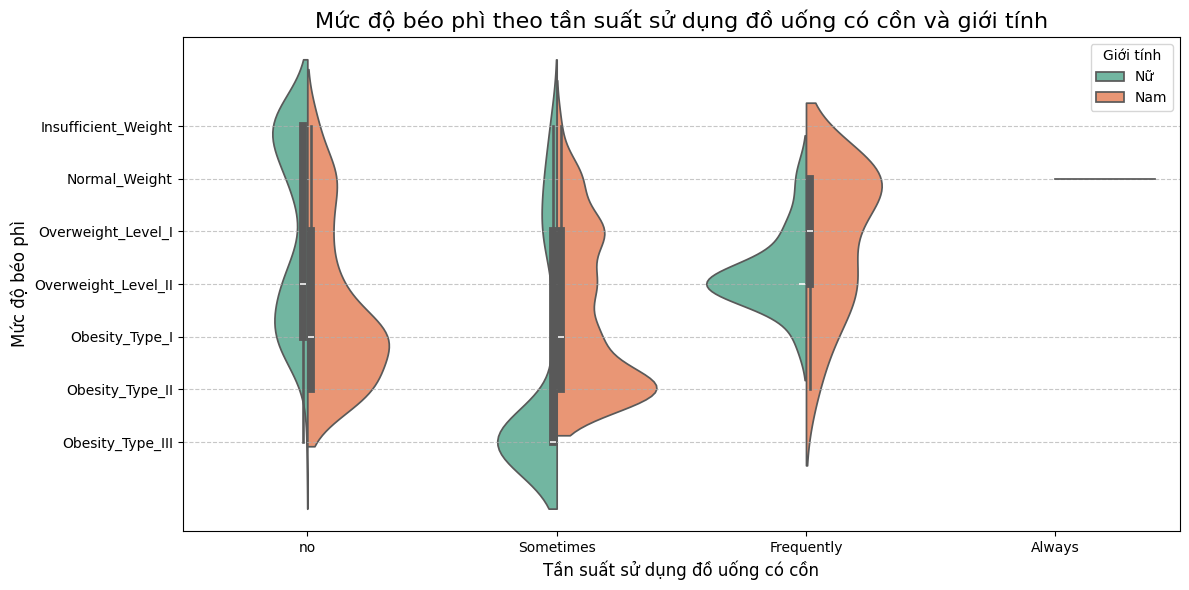

In [68]:
plt.figure(figsize=(12, 6))
sb.violinplot(
    data=teen_df,
    x="alcohol",  # Tần suất uống rượu
    y="obesity",  # Mức độ béo phì (đã sắp xếp thứ tự)
    hue="male",  # Phân biệt giới tính
    split=True,  # Tách hai giới trên cùng một violin
    palette="Set2"  # Cải thiện màu sắc
)

# Tùy chỉnh tiêu đề và nhãn
plt.title("Mức độ béo phì theo tần suất sử dụng đồ uống có cồn và giới tính", fontsize=16)
plt.xlabel("Tần suất sử dụng đồ uống có cồn", fontsize=12)
plt.ylabel("Mức độ béo phì", fontsize=12)

# Thay đổi labels của legend
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Nữ', 'Nam']  # Thay thế '0: Nữ', '1: Nam' bằng 'Nữ', 'Nam'
plt.legend(handles, labels, title="Giới tính", fontsize=10, loc="upper right")

plt.grid(axis="y", linestyle="--", alpha=0.7)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

Tương quan giữa BMI và giới tính trong độ tuổi từ 21-30

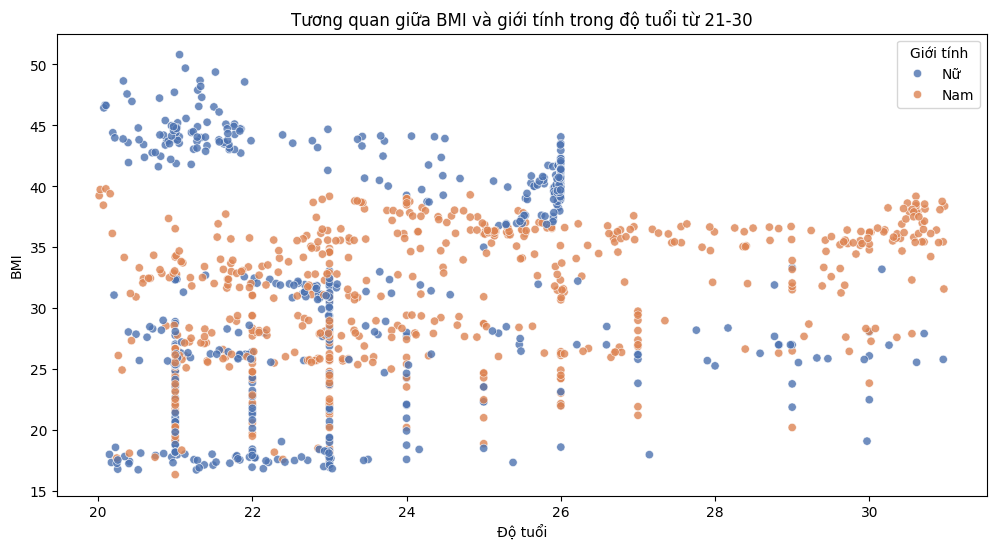

In [69]:
plt.figure(figsize=(12, 6))
sb.scatterplot(
    data=teen_df,
    x="age",
    y="BMI",
    hue="male",
    palette="deep",
    alpha=0.8
)
plt.title("Tương quan giữa BMI và giới tính trong độ tuổi từ 21-30")
plt.xlabel("Độ tuổi")
plt.ylabel("BMI")

# Thay đổi labels của legend
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Nữ', 'Nam']  # Thay thế 0 và 1 bằng "Nữ" và "Nam"
plt.legend(handles, labels, title="Giới tính", loc="upper right")

plt.show()